In [3]:
## import libraries
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping
!pip install wget
import wget

import sys, os, re, gc
from random import sample
import numpy.linalg as LA
import datetime
from sklearn.neighbors import NearestCentroid, NearestNeighbors

from sklearn.preprocessing import normalize, Normalizer
from sklearn.decomposition import KernelPCA
from imblearn.over_sampling import ADASYN, SMOTE, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE
from sklearn.manifold import TSNE

In [4]:
acp_feature_extraction = wget.download('https://raw.githubusercontent.com/mhdshl/ACP_Seq2Seq/main/utils/acp_feature_extraction.py')
ACP_DL_path = wget.download('https://raw.githubusercontent.com/mhdshl/ACP_Seq2Seq/main/trained_models/ACP_DL.h5')
ACP_MHCNN_path = wget.download('https://raw.githubusercontent.com/mhdshl/ACP_Seq2Seq/main/trained_models/ACP_MHCNN.h5')
ACP_LSE_path = wget.download('https://raw.githubusercontent.com/mhdshl/ACP_Seq2Seq/main/trained_models/ACP-LSE/ACP-LSE2.h5')


random_sequences = 'https://raw.githubusercontent.com/mhdshl/ACP_Seq2Seq/main/Data/random_from_func.txt'
trained_sequences = 'https://raw.githubusercontent.com/mhdshl/ACP_Seq2Seq/main/Data/gen_from_model.txt'
acp740 = 'https://raw.githubusercontent.com/mhdshl/ACP_Seq2Seq/main/Data/acp740.txt'

from acp_feature_extraction import *

## Prediction using Deep learning-based ACP Classifiers
### ACP-DL, ACP-MHCNN, and ACP-LSE

In [5]:
ACP_DL = tf.keras.models.load_model(ACP_DL_path)
ACP_MHCNN = tf.keras.models.load_model(ACP_MHCNN_path)
ACP_LSE = tf.keras.models.load_model(ACP_LSE_path)

### ACP-MHCNN

In [6]:
BPF_rand = numeric(dBPF, random_sequences)
dBIT_rand = numeric(dBIT, random_sequences)
dBLOSUM_rand = numeric(dBLOSUM, random_sequences)
BPF_rand = BPF_rand[:4000]
dBIT_rand = dBIT_rand[:4000]
dBLOSUM_rand = dBLOSUM_rand[:4000]

print(BPF_rand.shape)
print(dBIT_rand.shape)
print(dBLOSUM_rand.shape)

BPF_trained = numeric(dBPF, trained_sequences)
dBIT_trained = numeric(dBIT, trained_sequences)
dBLOSUM_trained = numeric(dBLOSUM, trained_sequences)
BPF_trained = BPF_trained[:4000]
dBIT_trained = dBIT_trained[:4000]
dBLOSUM_trained = dBLOSUM_trained[:4000]

print(BPF_trained.shape)
print(dBIT_trained.shape)
print(dBLOSUM_trained.shape)

y_pred_rand_MHCNN = ACP_MHCNN.predict([BPF_rand, dBIT_rand, dBLOSUM_rand])
y_pred_trained_MHCNN = ACP_MHCNN.predict([BPF_trained, dBIT_trained, dBLOSUM_trained])
print(y_pred_rand_MHCNN.shape)
print(y_pred_trained_MHCNN.shape)
pred_label_rand = np.argmax(y_pred_rand_MHCNN, axis=1)
pred_label_trained = np.argmax(y_pred_trained_MHCNN, axis=1)
print(pred_label_rand.shape)
print(pred_label_trained.shape)

172082/172082 [==============================] - 0s 0us/step
(4000, 25, 20)
(4000, 25, 31)
(4000, 25, 20)
207503/207503 [==============================] - 0s 0us/step
(4000, 25, 20)
(4000, 25, 31)
(4000, 25, 20)
125/125 [==============================] - 1s 8ms/step
(4000, 2)
(4000, 2)
(4000,)
(4000,)


### ACP-DL

In [7]:
data_dim = 483
timesteps = 1

bpf_rand, kmer_rand, label_rand = prepare_feature_ACP_DL(random_sequences)
bpf_rand = bpf_rand[:4000]
kmer_rand = kmer_rand[:4000]
label_rand = label_rand[:4000]
print(bpf_rand.shape)
print(kmer_rand.shape)
print(len(label_rand))

bpf_trained, kmer_trained, label_trained = prepare_feature_ACP_DL(trained_sequences)
bpf_trained = bpf_trained[:4000]
kmer_trained = kmer_trained[:4000]
label_trained = label_trained[:4000]
print(bpf_trained.shape)
print(kmer_trained.shape)
print(len(label_trained))

x_rand = np.concatenate((bpf_rand, kmer_rand), axis=1)
x_rand = np.reshape(x_rand, (len(x_rand), timesteps, data_dim))
x_trained = np.concatenate((bpf_trained, kmer_trained), axis=1)
x_trained = np.reshape(x_trained, (len(x_trained), timesteps, data_dim))
print(x_rand.shape)
print(x_trained.shape)

y_rand_pred_DL = ACP_DL.predict(x_rand)
y_trained_pred_DL = ACP_DL.predict(x_trained)
print(y_rand_pred_DL.shape)
print(y_trained_pred_DL.shape)

y_rand_label_DL = np.round(y_rand_pred_DL)
y_trained_label_DL = np.round(y_trained_pred_DL)
y_rand_label_DL = to_categorical(y_rand_label_DL)
y_trained_label_DL = to_categorical(y_trained_label_DL)
y_rand_label_DL = np.argmax(y_rand_label_DL, axis=1)
y_trained_label_DL = np.argmax(y_trained_label_DL, axis=1)
y_rand_label_DL = y_rand_label_DL.astype(int)
y_trained_label_DL = y_trained_label_DL.astype(int)
print(y_rand_label_DL.shape)
print(y_trained_label_DL.shape)

(4000, 140)
(4000, 343)
4000
(4000, 140)
(4000, 343)
4000
(4000, 1, 483)
(4000, 1, 483)
125/125 [==============================] - 0s 3ms/step
(4000, 1)
(4000, 1)
(4000,)
(4000,)


### ACP-LSE

In [8]:
[DataX_rand, LabelY_rand] = Convert_Seq2CKSAAP(prepare_feature_for_CKSAAP(random_sequences), gap=8)
DataX_rand = DataX_rand[:4000]
LabelY_rand = LabelY_rand[:4000]
print(DataX_rand.shape)
print(LabelY_rand.shape)
[DataX_trained, LabelY_trained] = Convert_Seq2CKSAAP(prepare_feature_for_CKSAAP(trained_sequences), gap=8)
DataX_trained = DataX_trained[:4000]
LabelY_trained = LabelY_trained[:4000]
print(DataX_trained.shape)
print(LabelY_trained.shape)

y_pred_rand_LSE, _ = ACP_LSE.predict(DataX_rand)
y_pred_trained_LSE, _ = ACP_LSE.predict(DataX_trained)
print(y_pred_rand_LSE.shape)
print(y_pred_trained_LSE.shape)

y_pred_label_rand_LSE = np.argmax(y_pred_rand_LSE, axis=1)
y_pred_label_trained_LSE = np.argmax(y_pred_trained_LSE, axis=1)
print(y_pred_label_rand_LSE.shape)
print(y_pred_label_trained_LSE.shape)

num pos: 4065 num neg: 0
(4000, 3600)
(4000, 1)
num pos: 5266 num neg: 0
(4000, 3600)
(4000, 1)
125/125 [==============================] - 1s 4ms/step
(4000, 2)
(4000, 2)
(4000,)
(4000,)


## Analysis

### 1st Tier Filtering

In [97]:
ACP_sequences = prepare_feature_for_CKSAAP(trained_sequences)
pos_seq_740 = prepare_feature_for_CKSAAP(acp740)
pos_seq_740 = pos_seq_740[0:376]
acp740_pos = []
for i in range(0, len(pos_seq_740)):
  acp740_pos.append(pos_seq_740[i][1])
acp740_pos = np.array(acp740_pos)

print(len(ACP_sequences))
print(acp740_pos.shape)

ACP_sequences = ACP_sequences[0:4000]
ACP_synthetic_sequences = []
for i in range(0, len(ACP_sequences)):
  ACP_synthetic_sequences.append(ACP_sequences[i][1])
ACP_synthetic_sequences = np.array(ACP_synthetic_sequences)
print(ACP_synthetic_sequences.shape)

5266
(376,)
(4000,)


In [10]:
matching_seq_ind_trained = []
for i in range(0, LabelY_trained.shape[0]):
  if y_trained_label_DL[i] == pred_label_trained[i] == y_pred_label_trained_LSE[i] == 1:
    matching_seq_ind_trained.append(i)
print('Number of Positive ACPs (rank = 3) for ACPs generated using our model:',len(matching_seq_ind_trained))
print('Total number of sequences (trained):',LabelY_trained.shape[0])
print('Accuracy = ', len(matching_seq_ind_trained)/LabelY_trained.shape[0])

Number of Positive ACPs (rank = 3) for ACPs generated using our model: 1477
Total number of sequences (trained): 4000
Accuracy =  0.36925


In [22]:
date = datetime.datetime.now().strftime("%Y%m%d")
print(date)

first_tier_sequences = ACP_synthetic_sequences[matching_seq_ind_trained]
print(first_tier_sequences.shape)
dataset = pd.DataFrame({'First Tier Filtered Sequences': list(first_tier_sequences), 'First Tier Filtered Sequences': list(first_tier_sequences)}, columns=['First Tier Filtered Sequences'])
dataset.to_excel("ACP_seq2seq_"+str(date)+"_first_tier_filter.xlsx")

matching_seq_ind_rand = []
for i in range(0, LabelY_rand.shape[0]):
  if y_rand_label_DL[i] == pred_label_rand[i] == y_pred_label_rand_LSE[i] == 1:
    matching_seq_ind_rand.append(i)
print('Number of Positive ACPs (rank = 3) for randomly generated ACPs:',len(matching_seq_ind_rand))
print('Total number of sequences (random):',LabelY_rand.shape[0])
print('Accuracy = ', len(matching_seq_ind_rand)/LabelY_rand.shape[0])

20240602
(1477,)
Number of Positive ACPs (rank = 3) for randomly generated ACPs: 455
Total number of sequences (random): 4000
Accuracy =  0.11375


In [12]:
bpf_trained_filtered = bpf_trained[matching_seq_ind_trained]
kmer_trained_filtered = kmer_trained[matching_seq_ind_trained]
print(bpf_trained_filtered.shape)
print(kmer_trained_filtered.shape)

label_trained_filtered = y_trained_label_DL[matching_seq_ind_trained]
print(label_trained_filtered.shape)

x_filtered_trained = np.concatenate((bpf_trained_filtered, kmer_trained_filtered), axis=1)
x_filtered_trained = np.reshape(x_filtered_trained, (len(x_filtered_trained), timesteps, data_dim))
print(x_filtered_trained.shape)

(1477, 140)
(1477, 343)
(1477,)
(1477, 1, 483)


In [13]:
model_tsne = tensorflow.keras.Model(ACP_DL.inputs, ACP_DL.layers[-2].input)
model_tsne.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm1_input (InputLayer)    [(None, 1, 483)]          0         
                                                                 
 lstm1 (LSTM)                (None, 128)               313344    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
Total params: 313344 (1.20 MB)
Trainable params: 313344 (1.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
bpf_740, kmer_740, label_740 = prepare_feature_ACP_DL(acp740)
print(bpf_740.shape)
print(kmer_740.shape)
print(len(label_740))
features_DL = np.concatenate((bpf_740, kmer_740), axis=1)
features_DL = np.reshape(features_DL, (len(features_DL), timesteps, data_dim))
print(features_DL.shape)

31144/31144 [==============================] - 0s 0us/step
(740, 140)
(740, 343)
740
(740, 1, 483)


In [15]:
features_DL = model_tsne.predict(features_DL)
print(features_DL.shape)

DL_filtered_features = model_tsne.predict(x_filtered_trained)
print(DL_filtered_features.shape)

24/24 [==============================] - 0s 3ms/step
(740, 128)
47/47 [==============================] - 0s 3ms/step
(1477, 128)


In [87]:
combined_seq = np.concatenate((features_DL, DL_filtered_features), axis=0)
print(combined_seq.shape)
normalizer = Normalizer().fit(combined_seq)
combined_norm = normalizer.transform(combined_seq)

# transformer = KernelPCA(n_components=2)
# transformer.fit_transform(combined_norm)
# combined_CKSAAP_tsne = transformer.transform(combined_norm)

tsne = TSNE(n_components=2, random_state=123)
combined_CKSAAP_tsne = tsne.fit_transform(combined_norm)

print(combined_CKSAAP_tsne.shape)

(2217, 128)
(2217, 2)


Text(0.5, 1.0, 'First Tier Filtered ACPs vs Known ACP Dataset (acp740)')

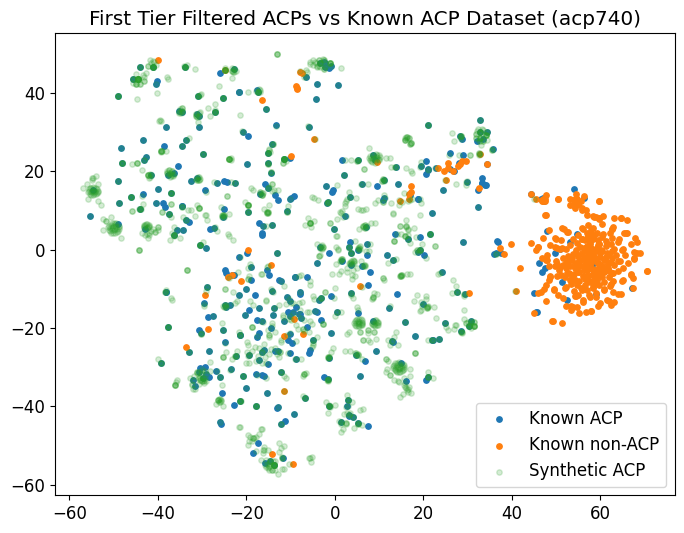

In [88]:
marker_size = 15
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize =(8, 6))
plt.scatter(combined_CKSAAP_tsne[0:376,0],combined_CKSAAP_tsne[0:376,1],s=marker_size,label='Known ACP')
plt.scatter(combined_CKSAAP_tsne[376:740,0],combined_CKSAAP_tsne[376:740,1],s=marker_size,label='Known non-ACP')
plt.scatter(combined_CKSAAP_tsne[740:-1,0],combined_CKSAAP_tsne[740:-1,1],s=marker_size,alpha = 0.2, label='Synthetic ACP')
plt.legend() # loc='upper right'
plt.title('First Tier Filtered ACPs vs Known ACP Dataset (acp740)')
# plt.savefig('first_tier_vs_740.png',dpi=(300), bbox_inches='tight')
# # plt.savefig('first_tier_vs_740.eps', format='eps')
# plt.savefig('first_tier_vs_740.pdf', format='pdf', bbox_inches='tight')

## Second Tier Filter

In [90]:
pca740 = combined_CKSAAP_tsne[0:740]
clf = NearestCentroid()
clf.fit(pca740, label_740)
total_pred = clf.predict(combined_CKSAAP_tsne)
print(total_pred.shape)
pred_synth = total_pred[740:]
print(pred_synth.shape)

second_tier_seq = []
second_tier_ind = []
for i in range(0, pred_synth.shape[0]):
  if pred_synth[i] == 1:
    second_tier_seq.append(first_tier_sequences[i])
    second_tier_ind.append(i)
print(len(second_tier_seq))

second_tier_seq = np.array(second_tier_seq)
second_tier_ind = np.array(second_tier_ind)
print(second_tier_ind.shape)

dataset = pd.DataFrame({'Second Tier Filtered Sequences': list(second_tier_seq), 'Second Tier Filtered Sequences': list(second_tier_seq)}, columns=['Second Tier Filtered Sequences'])
dataset.to_excel("ACP_seq2seq_"+str(date)+"_second_tier_filter.xlsx")

second_tier_tsne_ind = second_tier_ind + 740
print(second_tier_tsne_ind.shape)
# print(second_tier_tsne_ind[0:10])
# print(second_tier_ind[120:140])

(2217,)
(1477,)
1364
(1364,)
(1364,)


Text(0.5, 1.0, 'Second Tier Filtered ACPs vs Known ACP Dataset (acp740)')

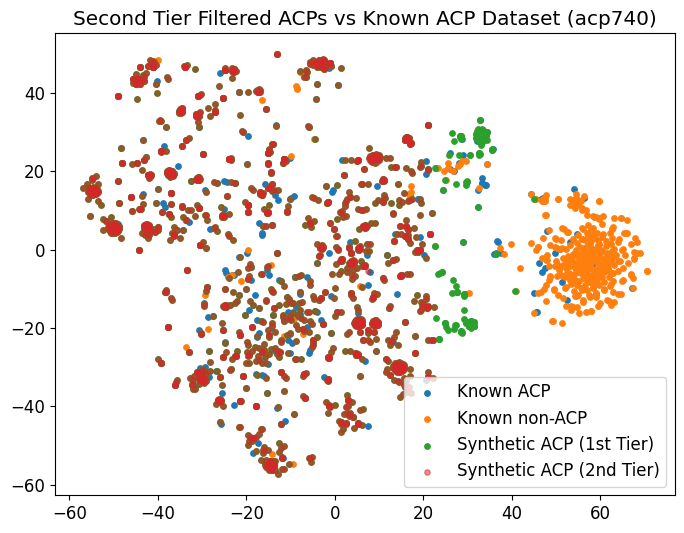

In [93]:
marker_size = 15
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize =(8, 6))
plt.scatter(combined_CKSAAP_tsne[0:376,0],combined_CKSAAP_tsne[0:376,1],s=marker_size,label='Known ACP')
plt.scatter(combined_CKSAAP_tsne[376:740,0],combined_CKSAAP_tsne[376:740,1],s=marker_size,label='Known non-ACP')
plt.scatter(combined_CKSAAP_tsne[740:-1,0],combined_CKSAAP_tsne[740:-1,1],s=marker_size,alpha = 1, label='Synthetic ACP (1st Tier)')
plt.scatter(combined_CKSAAP_tsne[second_tier_tsne_ind,0],combined_CKSAAP_tsne[second_tier_tsne_ind,1],s=marker_size,alpha = 0.5, label='Synthetic ACP (2nd Tier)')
plt.legend() # loc='upper right'
plt.title('Second Tier Filtered ACPs vs Known ACP Dataset (acp740)')

# plt.savefig('second_tier_vs_740.png',dpi=(300), bbox_inches='tight')
# plt.savefig('second_tier_vs_740.pdf', format='pdf', bbox_inches='tight')

## Third Tier Filter

In [100]:
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(combined_CKSAAP_tsne[0:376])
distances, indices = nbrs.kneighbors(combined_CKSAAP_tsne[second_tier_ind])
print(distances.shape)
print(indices.shape)

distance_val = np.sort(distances, axis=0)
print(distance_val[0], distance_val[-1])

distance_ind = np.argsort(distances, axis=0)
print(distance_ind[0], distance_ind[-1])

sorted_indices = indices[distance_ind]
known_pos_ACP = combined_CKSAAP_tsne[0:376]
print(known_pos_ACP[sorted_indices[0]])

# plt.hist(distances, bins=100)
# plt.show()

(1364, 1)
(1364, 1)
[0.] [11.97942091]
[0] [419]
[[[18.896833 12.835054]]]


In [102]:
predicted_ACPs = combined_CKSAAP_tsne[second_tier_tsne_ind]

criteria_1_ind = predicted_ACPs[:, 0]<0
temp = predicted_ACPs[criteria_1_ind]
print(temp.shape)

criteria_2_ind = temp[:, 0]>-20
temp = temp[criteria_2_ind]
print(temp.shape)

criteria_3_ind = temp[:, 1]<20
temp = temp[criteria_3_ind]
print(temp.shape)

criteria_4_ind = temp[:, 1]>-20
temp = temp[criteria_4_ind]

print(temp.shape)
print(criteria_1_ind.shape)
print(criteria_2_ind.shape)
print(criteria_3_ind.shape)
print(criteria_4_ind.shape)

(922, 2)
(404, 2)
(324, 2)
(161, 2)
(1364,)
(922,)
(404,)
(324,)


In [103]:
original_ind = np.array(range(0,predicted_ACPs.shape[0]))

my_filtered = original_ind[criteria_1_ind]
print(my_filtered.shape)

my_filtered = my_filtered[criteria_2_ind]
print(my_filtered.shape)

my_filtered = my_filtered[criteria_3_ind]
print(my_filtered.shape)

my_filtered = my_filtered[criteria_4_ind]
print(my_filtered.shape)
print(my_filtered)

(922,)
(404,)
(324,)
(161,)
[   2    7   17   31   51   52   62   66   67   76   97  101  127  130
  133  135  165  166  169  177  188  189  197  207  210  216  220  221
  224  229  261  273  274  276  277  284  285  291  301  303  319  330
  335  337  338  339  341  345  368  369  371  386  388  415  445  448
  449  453  459  467  470  480  482  484  487  489  504  526  553  556
  557  562  563  588  634  655  656  660  662  673  683  690  693  702
  704  708  736  745  750  770  776  793  794  795  799  800  814  815
  823  842  843  844  845  853  855  862  869  886  894  895  906  908
  917  951  952  974  988  996 1007 1011 1015 1018 1022 1026 1033 1039
 1043 1044 1045 1064 1066 1069 1073 1084 1093 1094 1116 1121 1138 1143
 1170 1171 1190 1202 1218 1220 1224 1227 1240 1262 1271 1291 1298 1300
 1325 1334 1335 1336 1337 1339 1351]


In [112]:
dis_temp = distances[my_filtered]
print(dis_temp.shape)
ind_temp = indices[my_filtered]
print(ind_temp[-1])
print(indices[-1])

third_tier_seq = np.squeeze(first_tier_sequences[my_filtered])
print(third_tier_seq.shape)
matching_740_seq = np.squeeze(acp740_pos[ind_temp])
print(matching_740_seq.shape)

dataset = pd.DataFrame({'Third Tier Filtered Sequences': list(third_tier_seq), 'Third Tier Filtered Sequences': list(third_tier_seq), 'Known Matching Sequences': list(matching_740_seq), 'Distance': list(dis_temp)}, columns=['Third Tier Filtered Sequences', 'Known Matching Sequences', 'Distance'])
dataset.to_excel("ACP_seq2seq_"+str(date)+"_third_tier_filter.xlsx")

(161, 1)
[3]
[314]
(161,)
(161,)


Text(0.5, 1.0, 'Third Tier Filtered ACPs vs Known ACP Dataset (acp740)')

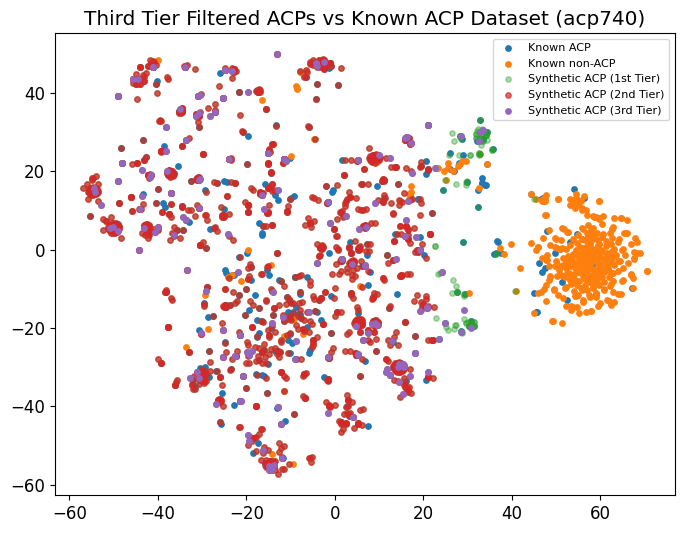

In [113]:
marker_size = 15
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize =(8, 6))
plt.scatter(combined_CKSAAP_tsne[0:376,0],combined_CKSAAP_tsne[0:376,1],s=marker_size,label='Known ACP')
plt.scatter(combined_CKSAAP_tsne[376:740,0],combined_CKSAAP_tsne[376:740,1],s=marker_size,label='Known non-ACP')
plt.scatter(combined_CKSAAP_tsne[740:-1,0],combined_CKSAAP_tsne[740:-1,1],s=marker_size,alpha = 0.4, label='Synthetic ACP (1st Tier)')
plt.scatter(combined_CKSAAP_tsne[second_tier_tsne_ind,0],combined_CKSAAP_tsne[second_tier_tsne_ind,1],s=marker_size,alpha = 0.7, label='Synthetic ACP (2nd Tier)')
plt.scatter(combined_CKSAAP_tsne[my_filtered+740,0],combined_CKSAAP_tsne[my_filtered+740,1],s=marker_size,alpha = 1, label='Synthetic ACP (3rd Tier)')

plt.legend(fontsize=8) # loc='upper right'
plt.title('Third Tier Filtered ACPs vs Known ACP Dataset (acp740)')

# plt.savefig('second_tier_vs_740.png',dpi=(300), bbox_inches='tight')
# plt.savefig('second_tier_vs_740.pdf', format='pdf', bbox_inches='tight')